In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics

# train 데이터 가져오기, 변수 간 상관관계 분석

In [2]:
# train data 가져오기
df_train = pd.read_csv('./Train.csv')
print(df_train)

     Relapse  CEA_Post  Lymphatic  Vascular  pStage  pT  pN  Perineural  Age
0          0       0.0          0         0       4   2   2           0   73
1          0       1.2          1         0       4   2   2           1   73
2          1       1.8          1         0       4   1   2           0   53
3          0       0.0          1         0       4   2   2           0   57
4          1      52.0          1         1       6   4   3           0   65
..       ...       ...        ...       ...     ...  ..  ..         ...  ...
387        0       1.7          0         0       4   3   2           0   57
388        0       4.1          0         0       4   4   1           0   63
389        0       2.2          1         0       5   2   3           0   63
390        0       5.2          0         0       4   1   2           0   57
391        1       2.8          1         0       4   1   2           0   52

[392 rows x 9 columns]


<AxesSubplot:>

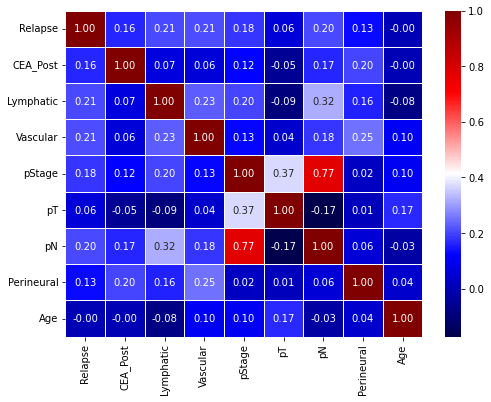

In [3]:
# 변수 간 상관관계 분석
corr_matrix = df_train.corr()

plt.figure(figsize=(8,6))
sns.heatmap(data=corr_matrix, annot=True, fmt='.2f', linewidths=.5, cmap='seismic')

# 로지스틱 회귀 분석 모델 생성

In [4]:
Label = df_train['Relapse']
InputFeature = df_train[['CEA_Post', 'Lymphatic', 'Vascular', 'pStage', 'pT', 'pN', 'Perineural', 'Age']]
InputFeature = sm.add_constant(InputFeature) # 상수항 추가
model = sm.Logit(Label, InputFeature)
model = model.fit()

Optimization terminated successfully.
         Current function value: 0.614428
         Iterations 8


/Users/jeon-inseo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [5]:
print(model.summary())

# 총 8개 피처 중에서 유의미한 피처, 즉 p-value<0.05인 피처는
# CEA_Post, Lymphatic, Vascular

                           Logit Regression Results                           
Dep. Variable:                Relapse   No. Observations:                  392
Model:                          Logit   Df Residuals:                      383
Method:                           MLE   Df Model:                            8
Date:                Sat, 18 Jun 2022   Pseudo R-squ.:                 0.09721
Time:                        14:50:12   Log-Likelihood:                -240.86
converged:                       True   LL-Null:                       -266.79
Covariance Type:            nonrobust   LLR p-value:                 1.785e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9695      0.828     -2.378      0.017      -3.593      -0.346
CEA_Post       0.0182      0.009      2.127      0.033       0.001       0.035
Lymphatic      0.6391      0.261      2.445      0.0

In [6]:
# Odds ratio
np.exp(model.params).round(4)

# 총 8개 피처 중에서 유의미한 피처 CEA_Post, Lymphatic, Vascular 3개만 해석하면 됨
# CEA_Post가 1 오를 때 odds가 1.0184 증가
# Lymphatic이 1 오를 때 odds가 1.8947 증가
# Vascular가 1 오를 때 odds가 1.7910 증가

const         0.1395
CEA_Post      1.0184
Lymphatic     1.8947
Vascular      1.7910
pStage        0.8528
pT            1.2721
pN            1.6670
Perineural    1.3556
Age           0.9962
dtype: float64

# 유의미한 변수만 선택하여 다시 로지스틱 회귀 분석 모델 생성

In [7]:
# 유의미한 피처 리스트
SignificantFeature = df_train[['CEA_Post', 'Lymphatic', 'Vascular']]

In [8]:
# 유의미한 피처만 사용한 최종 모델
SignificantFeature = sm.add_constant(SignificantFeature)
model_final = sm.Logit(Label, SignificantFeature)
model_final = model_final.fit()

Optimization terminated successfully.
         Current function value: 0.624307
         Iterations 8


/Users/jeon-inseo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [9]:
print(model_final.summary())

                           Logit Regression Results                           
Dep. Variable:                Relapse   No. Observations:                  392
Model:                          Logit   Df Residuals:                      388
Method:                           MLE   Df Model:                            3
Date:                Sat, 18 Jun 2022   Pseudo R-squ.:                 0.08269
Time:                        14:50:23   Log-Likelihood:                -244.73
converged:                       True   LL-Null:                       -266.79
Covariance Type:            nonrobust   LLR p-value:                 1.421e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3552      0.227     -5.972      0.000      -1.800      -0.910
CEA_Post       0.0224      0.009      2.388      0.017       0.004       0.041
Lymphatic      0.7785      0.246      3.160      0.0

# 모델 해석

In [15]:
pd.DataFrame({'odds_ratio' : np.exp(model_final.params).round(4),
             'p_value': model_final.pvalues.round(4)})

# 최종 모델의 Odds ratio
# CEA_Post가 1 오를 때 odds가 1.0227 증가
# Lymphatic이 1 오를 때 odds가 2.1782 증가
# Vascular가 1 오를 때 odds가 2.0136 증가

,odds_ratio,p_value
const,0.2579,0.0000
CEA_Post,1.0227,0.0169
Lymphatic,2.1782,0.0016
Vascular,2.0136,0.0014


# validation 데이터 사용하여 모델 성능 평가

In [16]:
# validation data 가져오기
df_valid = pd.read_csv('./Valid.csv')
print(df_valid.head(10))

   Relapse  CEA_Post  Lymphatic  Vascular  pStage  pT  pN  Perineural  Age
0        0       1.2          1         0       5   1   3           0   42
1        1       1.0          1         0       4   2   2           0   45
2        1       9.2          1         0       6   4   3           0   69
3        1       0.0          0         0       5   5   1           0   64
4        0       2.3          1         1       5   1   3           0   72
5        1       1.0          1         1       5   4   2           0   69
6        0       2.4          0         0       5   5   1           0   53
7        1       1.4          1         1       5   1   3           0   62
8        0       2.0          1         1       4   2   2           1   69
9        0      13.7          1         1       4   3   2           0   72


In [17]:
InputFeature_valid = df_valid[['CEA_Post', 'Lymphatic', 'Vascular']]
InputFeature_valid = sm.add_constant(InputFeature_valid)

/Users/jeon-inseo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


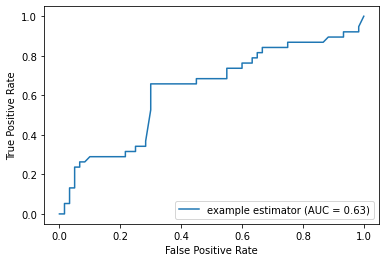

In [18]:
y = np.array(df_valid['Relapse'])
pred = np.array(model_final.predict(InputFeature_valid))

fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()
# 폐암 재발 여부를 예측하는 모델은 sensitivity가 높아야 하므로 threshold가 낮아야 한다.